<a href="https://colab.research.google.com/github/abreham-gebremedin/Deep-learning-/blob/main/Deep_Learning_for_chest_xray_Image_pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abreham Gebremedin
 (https://abreham-gebremedin.herokuapp.com/)

# The Image Classification Challenge

Build an image classification model with accuracy to identify whether a person has been infected with pneumonia or not by looking at the Chest X-Ray Images. Accuracy is vital for such a machine learning image classification model as it is a matter of lives. You might have gotten the idea about how important of an application it is. So, without any further delay let’s get started with CNN image classification python.
# Deep Learning for Medical Image Classification

Deep learning for the medical image classification is not only a topic of hot research but is a key technique of computer-aided diagnosis systems today.  Qure.ai,  a company that aims at providing cost-effective, timely, and expert diagnosis even in the remotest of places uses deep learning algorithms to identify and localize abnormalities on X-rays, MRIs, and CT scans. Covid-19 has really tested the effectiveness of these algorithms in a real-world setting. Not only are these algorithms being used for the early detection and diagnosis of the infection but they are also being used in the development of drugs and vaccines to reduce the load on healthcare workers and also fast-track the process.
# Image Classification Model Python for Detecting Pneumonia from X-ray Images

According to WHO, every year over 150 million people are infected with pneumonia particularly kids below the age of 5 years. One in three deaths in India are caused due to pneumonia as reported by the World Health Organization (WHO). Chest X-rays are at the moment, the best available method for diagnosing pneumonia, and therefore play a crucial role in diagnosing and providing clinical care to the ones affected. However, detecting pneumonia in chest X-rays is a challenging task that relies on the availability of expert radiologists. Experts are either not available in remote areas or most people can’t afford it. Under such circumstances, automating the detection of diseases through AI becomes the need of the hour. In fact, there are at least 2 yearly competitions on Kaggle hosted by research organizations, where the goal is to detect an ailment from medical images. We are going to do something similar here. We’ll build an end-to-end machine learning pipeline that uses X-ray images of the lungs to detect pneumonia in patients.

In [28]:
import opendatasets as od
import pandas as pd
  
od.download(
    "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abrehamgebremedin
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:18<00:00, 134MB/s] 


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import tensorflow as tf 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D , BatchNormalization , MaxPool2D ,Dense , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import cv2
import os

In [30]:
output_labels=['PNEUMONIA','NORMAL']
img_size=200
def get_data(path_given):
    data=[]
    for labels in output_labels:
        path=os.path.join(path_given,labels)
        ind=output_labels.index(labels)
        for images in os.listdir(path):
            try:
                img=cv2.imread(os.path.join(path,images),cv2.IMREAD_GRAYSCALE)
                resizing=cv2.resize(img,(img_size,img_size))
                
                data.append([resizing,ind])
            except Exception as e:
                print(e)
                
    return(np.array(data))

In [31]:
#getting data
training_data=get_data("/content/chest-xray-pneumonia/chest_xray/train")
test_data=get_data("/content/chest-xray-pneumonia/chest_xray/test")
valid_data=get_data("/content/chest-xray-pneumonia/chest_xray/val")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


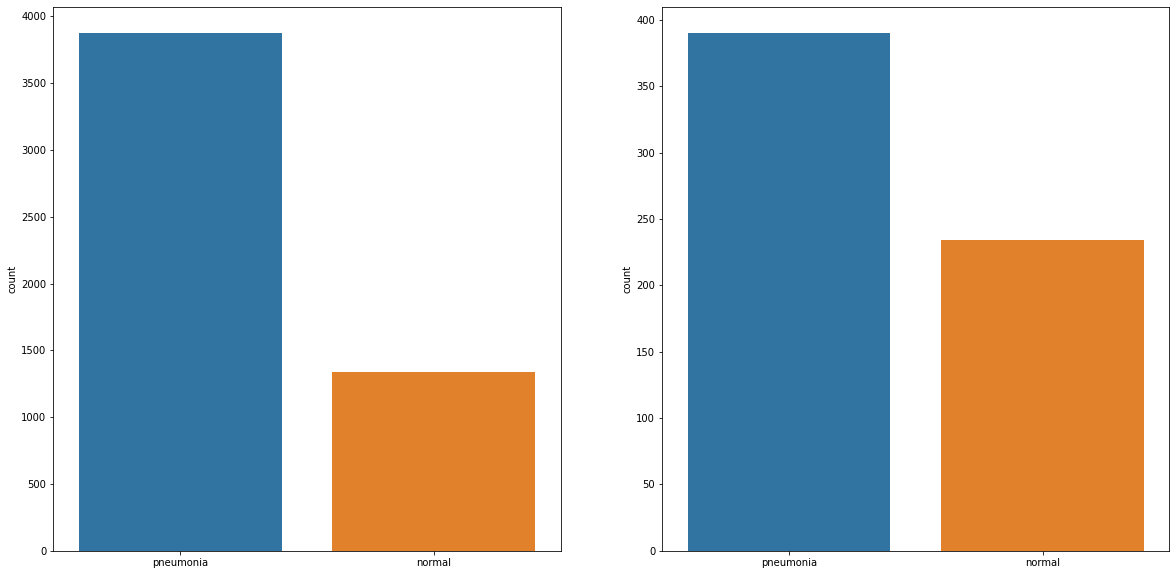

In [32]:
l=[]
k=[]
plt.figure(figsize=(20,10))
for i in training_data:
    if(i[1]==0):
        l.append("pneumonia")
    else:
        l.append("normal")
#print(l)
plt.subplot(1,2,1)        
sns.countplot(l)

for j in test_data:
    if(j[1]==0):
        k.append('pneumonia')
    else:
        k.append('normal')
plt.subplot(1,2,2)
sns.countplot(k)

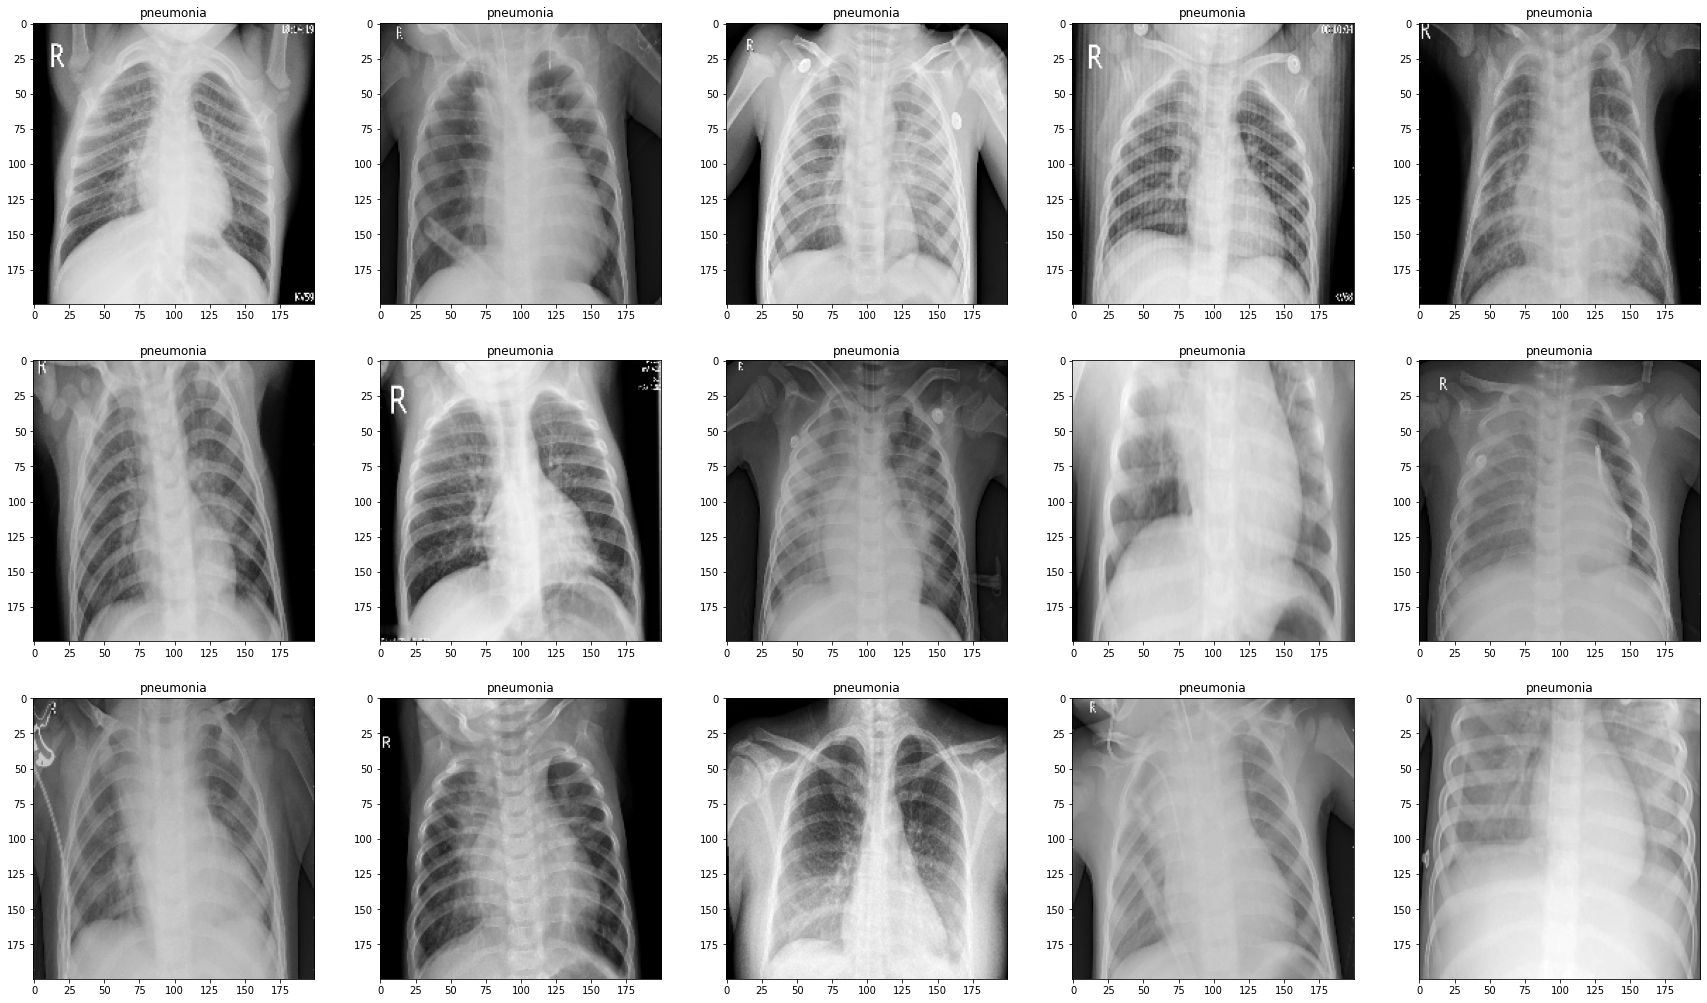

In [33]:
plt.figure(figsize=(30,30))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.imshow(training_data[i][0],cmap='gray')
    if(training_data[i][1]==0):
        
        plt.title('pneumonia')
    else:
        
        plt.title('Normal')
plt.show()

In [34]:
x_train,y_train=[],[]

x_test , y_test =[],[]

x_val , y_val =[],[]

for i in training_data:
    x_train.append(i[0])
    y_train.append(i[1])
    
for j in test_data:
    x_test.append(j[0])
    y_test.append(j[1])

for k in valid_data:
    x_val.append(k[0])
    y_val.append(k[1])
    
    
x_train=np.array(x_train)/255
y_train=np.array(y_train)

x_test=np.array(x_test)/255
y_test=np.array(y_test)

x_val=np.array(x_val)/255
y_val=np.array(y_val)


x_train=x_train.reshape(-1,200,200,1)
x_test=x_test.reshape(-1,200,200,1)
x_val=x_val.reshape(-1,200,200,1)


In [35]:
augmentation= ImageDataGenerator(featurewise_center=False,
                                 # set input mean to 0 over the dataset
        samplewise_center=False, 
                                 # set each sample mean to 0
        featurewise_std_normalization=False,
                                 # divide inputs by std of the dataset
        samplewise_std_normalization=False,
                                 # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1)
augmentation.fit(x_train)

In [36]:

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (200,200,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "Adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 64)     2

In [37]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

 
history = model.fit_generator(augmentation.flow(x_train,y_train,batch_size=32),
                   steps_per_epoch=20,
                   epochs=10,
                   validation_data=augmentation.flow(x_val,y_val),
                   validation_steps=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.1768 - accuracy: 0.7078

20/20 [==============================] - 83s 4s/step - loss: 1.1768 - accuracy: 0.7078 - val_loss: 6.2010 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 75s 4s/step - loss: 0.3525 - accuracy: 0.8109
Epoch 3/10
20/20 [==============================] - 71s 4s/step - loss: 0.3160 - accuracy: 0.8531
Epoch 4/10
20/20 [==============================] - 71s 4s/step - loss: 0.2853 - accuracy: 0.8781
Epoch 5/10
20/20 [==============================] - 77s 4s/step - loss: 0.2703 - accuracy: 0.8969
Epoch 6/10
20/20 [==============================] - 71s 4s/step - loss: 0.2994 - accuracy: 0.8687
Epoch 7/10
20/20 [==============================] - 70s 4s/step - loss: 0.2682 - accuracy: 0.9016
Epoch 8/10
20/20 [==============================] - 76s 4s/step - loss: 0.2177 - accuracy: 0.9094
Epoch 9/10
20/20 [==============================] - 87s 4s/step - loss: 0.2278 - accuracy: 0.9078
Epoch 10/10
20/20 [==============================] - 84s 4s/step - loss: 0.2365 - accur

In [46]:
 print("Accuracy of the model is:",model.evaluate(x_test,y_test)[1]*100, "%")

20/20 [==============================] - 22s 1s/step - loss: 5.0147 - accuracy: 0.6250
Accuracy of the model is: 62.5 %


In [43]:
prediction=model.predict(x_test)


20/20 [==============================] - 17s 864ms/step


In [47]:
#SECOND MODEL
model= Sequential()

model.add(Conv2D(16,(3,3),strides=1,padding='same',activation='relu',input_shape=(200,200,1)))
model.add(Conv2D(16,(3,3),strides=1,padding='same',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(32,(3,3),strides=1,padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
#model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))



model.add(Conv2D(256,(3,3),strides=1,padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),strides=1,padding='same',activation='relu'))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 16)      160       
                                                                 
 conv2d_6 (Conv2D)           (None, 200, 200, 16)      2320      
                                                                 
 batch_normalization_5 (Batc  (None, 200, 200, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 100, 100, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)     

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

history1=model.fit(augmentation.flow(x_train,y_train,batch_size=32),epochs=40 , 
                  validation_data=augmentation.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/40
163/163 [==============================] - 879s 5s/step - loss: 0.5169 - accuracy: 0.7743 - val_loss: 1.4048 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/40
163/163 [==============================] - 861s 5s/step - loss: 0.3063 - accuracy: 0.8781 - val_loss: 5.2894 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/40
163/163 [==============================] - 858s 5s/step - loss: 0.2598 - accuracy: 0.8986 - val_loss: 5.4108 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/40
 44/163 [=======>......................] - ETA: 10:05 - loss: 0.2398 - accuracy: 0.9027

In [ ]:
 print("Accuracy of the model is:",model.evaluate(x_test,y_test)[1]*100, "%")